In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
# Carregar o CSV
df = pd.read_csv("./mercadoimobiliario.csv", sep=';')

# Extração e correção da variável 'Valor'
df['Valor'] = df['Valor'].str.replace(',', ".")
df['Valor'] = pd.to_numeric(df['Valor'].str.strip())

# Conversão de 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True, format='%d/%m/%Y')

# Ajustar nomes das colunas
df.columns = df.columns.str.strip()

# Extração de 'tipo_transacao' e 'tipo_credito'
df['tipo_transacao'] = df['Info'].apply(lambda x: x.split('_')[0])
df['tipo_credito'] = df.apply(lambda row: row['Info'].split('_')[1] if row['tipo_transacao'] == 'credito' else None, axis=1)

# Dicionário de mapeamento de estados para regiões
estado_para_regiao = {
    'ac': 'Norte', 'ap': 'Norte', 'am': 'Norte', 'pa': 'Norte', 'ro': 'Norte', 'rr': 'Norte', 'to': 'Norte',
    'al': 'Nordeste', 'ba': 'Nordeste', 'ce': 'Nordeste', 'ma': 'Nordeste', 'pb': 'Nordeste', 'pe': 'Nordeste', 'pi': 'Nordeste', 'rn': 'Nordeste', 'se': 'Nordeste',
    'df': 'Centro-Oeste', 'go': 'Centro-Oeste', 'mt': 'Centro-Oeste', 'ms': 'Centro-Oeste',
    'es': 'Sudeste', 'mg': 'Sudeste', 'rj': 'Sudeste', 'sp': 'Sudeste',
    'pr': 'Sul', 'rs': 'Sul', 'sc': 'Sul'
}

# Extração de 'estado' e mapeamento para 'regiao'
df['estado'] = df['Info'].apply(lambda x: x.split('_')[-1].lower())
df['regiao'] = df['estado'].apply(lambda estado: estado_para_regiao.get(estado, 'Desconhecido'))

# Ordenar por 'Data'
df_organizado_data = df.sort_values(by='Data')

# Renomear colunas
df_organizado_data.columns = ['data', 'info', 'valor', 'tipo_transacao', 'tipo_credito', 'estado', 'regiao']

# Resetar o índice
df_organizado_data = df_organizado_data.reset_index(drop=True)

# Exibir valores únicos
print(df['tipo_transacao'].unique())
print(df['tipo_credito'].unique())


['credito' 'imoveis' 'direcionamento' 'fontes' 'indices' 'contabil']
['estoque' 'contratacao' None]


In [7]:
print(df)

             Data                                           Info   
0      2020-09-30     credito_estoque_carteira_credito_pf_sfh_ma  \
1      2015-03-31     credito_estoque_carteira_credito_pf_sfh_ap   
2      2016-01-31   credito_estoque_risco_operacao_pf_livre_c_go   
3      2014-05-31    credito_estoque_risco_operacao_pj_fgts_b_go   
4      2016-02-29  credito_estoque_inadimplencia_pj_comercial_br   
...           ...                                            ...   
352152 2019-04-30     credito_contratacao_contratado_pj_livre_rj   
352153 2020-02-29                        imoveis_dormitorio_3_ma   
352154 2019-04-30     credito_contratacao_contratado_pj_livre_rs   
352155 2020-02-29                        imoveis_dormitorio_3_mg   
352156 2019-04-30     credito_contratacao_contratado_pj_livre_sc   

               Valor tipo_transacao tipo_credito estado        regiao  
0       3.275567e+09        credito      estoque     ma      Nordeste  
1       2.401430e+08        credito    

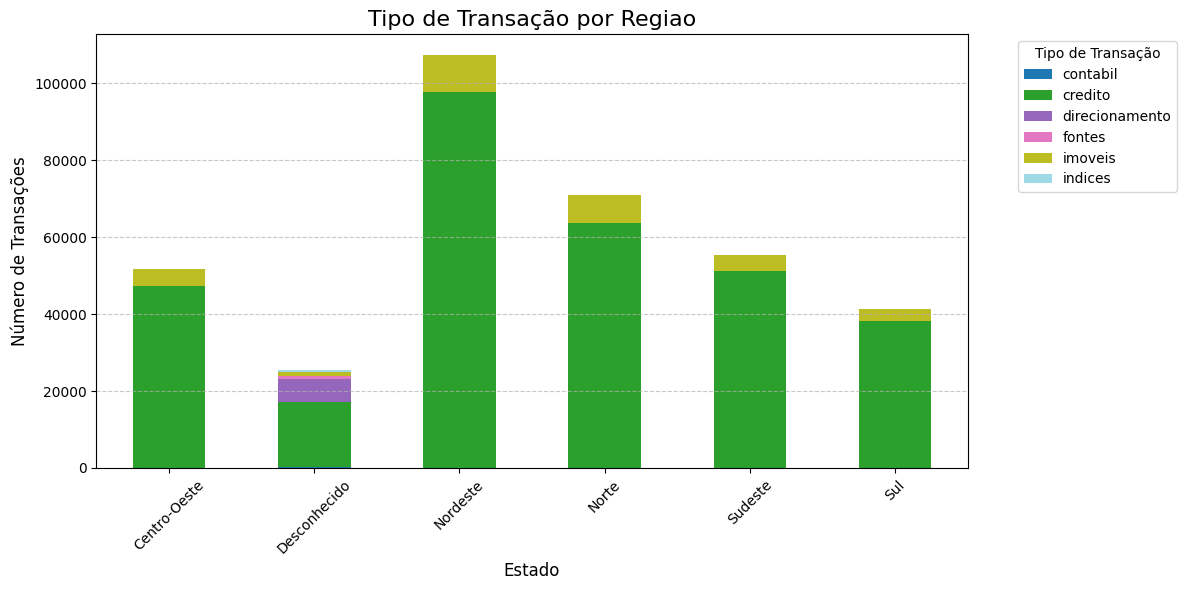

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
df.groupby(['regiao', 'tipo_transacao']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

ax.set_title('Tipo de Transação por Regiao', fontsize=16)
ax.set_xlabel('Regiao', fontsize=12)
ax.set_ylabel('Número de Transações', fontsize=12)
ax.legend(title='Tipo de Transação', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

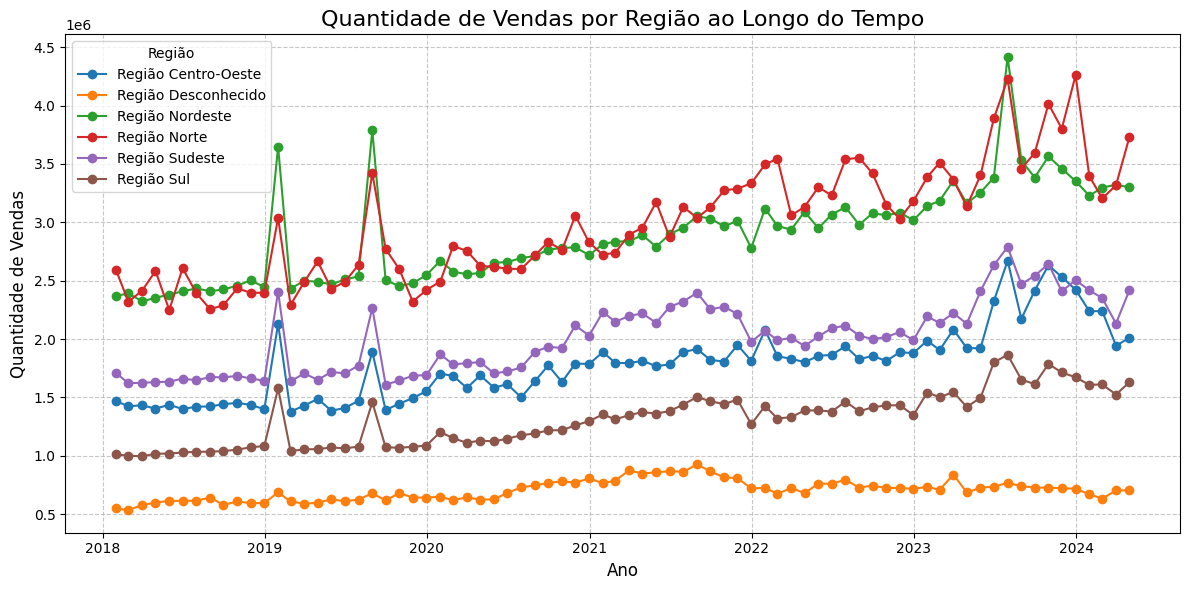

In [20]:

# Ordenar por 'Data'
df_organizado_data = df.sort_values(by='Data')

# Renomear colunas
df_organizado_data.columns = ['data', 'info', 'valor', 'tipo_transacao', 'tipo_credito', 'estado', 'regiao']

# Resetar o índice
df_organizado_data = df_organizado_data.reset_index(drop=True)

# Filtro para transações de imóveis
filtro_imoveis = df_organizado_data[df_organizado_data['tipo_transacao'].str.contains(r'\bimoveis\b', regex=True, case=False)]

# Agregar a quantidade de vendas por região e data
vendas_por_regiao = filtro_imoveis.groupby(['data', 'regiao'])['valor'].sum().reset_index()

# Criar a tabela pivot
vendas_pivot = vendas_por_regiao.pivot_table(index='data', columns='regiao', values='valor', aggfunc='sum')

# Plotar o gráfico
plt.figure(figsize=(12, 6))

for column in vendas_pivot:
    plt.plot(vendas_pivot.index, vendas_pivot[column], marker='o', linestyle='-', label=f'Região {column}')

# Configurar título e rótulos
plt.title('Quantidade de Vendas por Região ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.legend(title='Região')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()